In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import seaborn as sns

# The normal imports
from numpy.random import randn

# Import the stats librayr from numpy
from scipy import stats
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB #SciKitLearn GaussianNB Naive Bayes import
from sklearn import tree ##SciKitLearn GaussianNB Naive Bayes import


# Command so that plots appear in the iPython Notebook
%matplotlib inline

train = pd.read_csv('SumStudentClicksxResult-2-0-50.csv')   # better be in the correct directory!
test = pd.read_csv('SumStudentClicksxResult-2-50-100.csv')
test.head(5)

,id_student,SumOfsum_click,final_result
0,100893,250,Pass
1,101781,891,Pass
2,102806,486,Pass
3,102952,242,Pass
4,1035023,496,Pass


In [11]:
train.head(5)

,id_student,SumOfsum_click,final_result
0,100893,206,Pass
1,101781,1505,Pass
2,102806,590,Pass
3,102952,444,Pass
4,1035023,459,Pass


In [19]:


cols = ['SumOfsum_click']
cols2 = ['final_result']

trainArr = train.as_matrix(cols)
trainRes = train.as_matrix(cols2)

testArr = test.as_matrix(cols)
testRes = test.as_matrix(cols2)

#clf = GaussianNB()
clf = tree.DecisionTreeClassifier()

#print(trainArr[0])
#print(trainRes[0])
#print(testArr[0])
#print(testRes[0])

output = clf.fit(trainArr, trainRes).predict(testArr)

for i in range(390):
    #if testRes[i][0] == output[i] and testRes[i]=="Distinction":
    #if testRes[i][0] == output[i] and testRes[i]<>"Pass":
    if testRes[i][0] == output[i]:
        #print ""
        print("PREDICTION :    " + str(output[i])) + "  " + str(testArr[i]) + "       " + str(testRes[i] + "     CORRECT")
    else:
        print(str(i) + "PREDICTION:    " + str(output[i])) + "  " + str(testArr[i]) + "       " + str(testRes[i])


0PREDICTION:    Fail  [250]       ['Pass']
PREDICTION :    Pass  [891]       ['Pass     CORRECT']
PREDICTION :    Pass  [486]       ['Pass     CORRECT']
PREDICTION :    Pass  [242]       ['Pass     CORRECT']
PREDICTION :    Pass  [496]       ['Pass     CORRECT']
PREDICTION :    Pass  [683]       ['Pass     CORRECT']
PREDICTION :    Withdrawn  [170]       ['Withdrawn     CORRECT']
PREDICTION :    Pass  [82]       ['Pass     CORRECT']
8PREDICTION:    Fail  [214]       ['Pass']
PREDICTION :    Pass  [473]       ['Pass     CORRECT']
PREDICTION :    Pass  [821]       ['Pass     CORRECT']
PREDICTION :    Pass  [971]       ['Pass     CORRECT']
PREDICTION :    Pass  [201]       ['Pass     CORRECT']
13PREDICTION:    Withdrawn  [168]       ['Pass']
PREDICTION :    Pass  [355]       ['Pass     CORRECT']
15PREDICTION:    Withdrawn  [431]       ['Pass']
PREDICTION :    Pass  [295]       ['Pass     CORRECT']
PREDICTION :    Pass  [118]       ['Pass     CORRECT']
18PREDICTION:    Fail  [630]       ['

In [20]:
#clf = GaussianNB()
clf = tree.DecisionTreeClassifier()

#print(trainArr[0])
#print(trainRes[0])
#print(testArr[0])
#print(testRes[0])

output = clf.fit(trainArr, trainRes).predict(testArr)

for i in range(390):
    #if testRes[i][0] == output[i] and testRes[i]=="Distinction":
    #if testRes[i][0] == output[i] and testRes[i]<>"Pass":
    if testRes[i][0] == output[i]:
        #print ""
        print("PREDICTION :    " + str(output[i])) + "  " + str(testArr[i]) + "       " + str(testRes[i] + "     CORRECT")
    else:
        print(str(i) + "PREDICTION:    " + str(output[i])) + "  " + str(testArr[i]) + "       " + str(testRes[i])


0PREDICTION:    Fail  [250]       ['Pass']
PREDICTION :    Pass  [891]       ['Pass     CORRECT']
PREDICTION :    Pass  [486]       ['Pass     CORRECT']
PREDICTION :    Pass  [242]       ['Pass     CORRECT']
PREDICTION :    Pass  [496]       ['Pass     CORRECT']
PREDICTION :    Pass  [683]       ['Pass     CORRECT']
PREDICTION :    Withdrawn  [170]       ['Withdrawn     CORRECT']
PREDICTION :    Pass  [82]       ['Pass     CORRECT']
8PREDICTION:    Fail  [214]       ['Pass']
PREDICTION :    Pass  [473]       ['Pass     CORRECT']
PREDICTION :    Pass  [821]       ['Pass     CORRECT']
PREDICTION :    Pass  [971]       ['Pass     CORRECT']
PREDICTION :    Pass  [201]       ['Pass     CORRECT']
13PREDICTION:    Withdrawn  [168]       ['Pass']
PREDICTION :    Pass  [355]       ['Pass     CORRECT']
15PREDICTION:    Withdrawn  [431]       ['Pass']
PREDICTION :    Pass  [295]       ['Pass     CORRECT']
PREDICTION :    Pass  [118]       ['Pass     CORRECT']
18PREDICTION:    Fail  [630]       ['

In [21]:
correct = 0.0

for i in range(len(output)): 
    if testRes[i][0] == output[i]: 
        correct += 1
    
print(correct / len(output))


#print("Accuracy: " + gnb.score(testArr, testRes))
print("Accuracy: " + str(clf.score(testArr, testRes)))

0.537084398977
Accuracy: 0.537084398977


In [22]:
expected = testRes
predicted = clf.predict(testArr)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

Distinction       0.11      0.10      0.10        21
       Fail       0.21      0.32      0.25        50
       Pass       0.71      0.69      0.70       275
  Withdrawn       0.07      0.04      0.05        45

avg / total       0.54      0.54      0.54       391

[[  2   2  16   1]
 [  0  16  31   3]
 [ 15  48 190  22]
 [  1  11  31   2]]


In [23]:
count=0 
passn=0
fail=0
distinction=0
withdrawn=0
for i in range(len(output)): 
    count += 1
    if testRes[i][0]=='Pass':
        passn += 1
    if testRes[i][0]=='Fail':
        fail += 1
    if testRes[i][0]=='Distinction':
        distinction += 1
    if testRes[i][0]=='Withdrawn':
        withdrawn += 1
print ("Pass: " + str(passn))
print ("Fail: " + str(fail))
print ("Distinction: " + str(distinction))
print ("Withdrawn: " + str(withdrawn))
    

Pass: 275
Fail: 50
Distinction: 21
Withdrawn: 45


In [35]:
feature_names=('Pass','Fail', 'Distinction', 'Withdrawn')
with open("studentTree.dot", 'w') as f:
         f = tree.export_graphviz(clf, out_file=f, feature_names=feature_names)

(array([ 216.,  109.,   35.,   12.,   10.,    4.,    1.,    0.,    1.,    3.]),
 array([  1.00000000e+00,   3.76300000e+02,   7.51600000e+02,
          1.12690000e+03,   1.50220000e+03,   1.87750000e+03,
          2.25280000e+03,   2.62810000e+03,   3.00340000e+03,
          3.37870000e+03,   3.75400000e+03]),
 <a list of 10 Patch objects>)

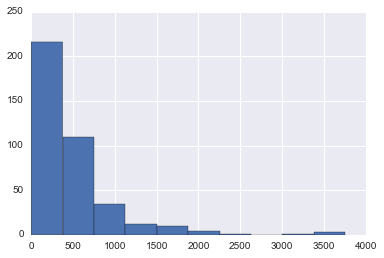

In [32]:
plt.hist(testArr)

(array([  1.73092557e-03,   1.21301084e-03,   9.40424131e-04,
          5.45173409e-04,   2.99845375e-04,   1.77181358e-04,
          1.09034682e-04,   5.45173409e-05,   8.17760114e-05,
          5.45173409e-05,   4.08880057e-05,   1.36293352e-05,
          1.36293352e-05,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.36293352e-05,   0.00000000e+00,
          1.36293352e-05,   2.72586705e-05]),
 array([  1.00000000e+00,   1.88650000e+02,   3.76300000e+02,
          5.63950000e+02,   7.51600000e+02,   9.39250000e+02,
          1.12690000e+03,   1.31455000e+03,   1.50220000e+03,
          1.68985000e+03,   1.87750000e+03,   2.06515000e+03,
          2.25280000e+03,   2.44045000e+03,   2.62810000e+03,
          2.81575000e+03,   3.00340000e+03,   3.19105000e+03,
          3.37870000e+03,   3.56635000e+03,   3.75400000e+03]),
 <a list of 20 Patch objects>)

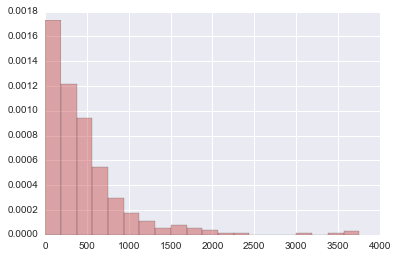

In [25]:
plt.hist(testArr, normed=True,color='indianred',alpha=0.5,bins=20)
#plt.hist(output, normed=True,alpha=0.5,bins=20)

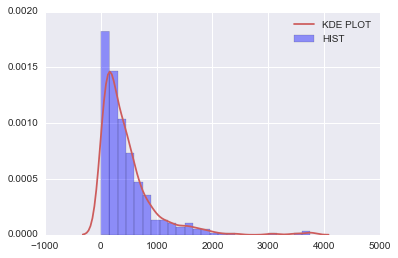

In [26]:
sns.distplot(testArr,bins=25,
            kde_kws={'color':'indianred','label':'KDE PLOT'},
            hist_kws={'color':'blue','label':"HIST"})

(array([  1.00707647e-03,   1.41693317e-03,   8.19713405e-04,
          5.73799383e-04,   3.27885362e-04,   2.45914021e-04,
          5.85509575e-05,   9.36815320e-05,   5.85509575e-05,
          1.17101915e-05,   3.51305745e-05,   1.17101915e-05,
          0.00000000e+00,   1.17101915e-05,   0.00000000e+00,
          3.51305745e-05,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.17101915e-05]),
 array([    7. ,   218.9,   430.8,   642.7,   854.6,  1066.5,  1278.4,
         1490.3,  1702.2,  1914.1,  2126. ,  2337.9,  2549.8,  2761.7,
         2973.6,  3185.5,  3397.4,  3609.3,  3821.2,  4033.1,  4245. ]),
 <a list of 20 Patch objects>)

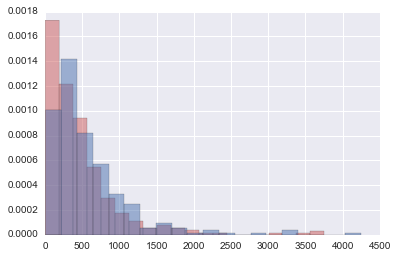

In [27]:
plt.hist(testArr, normed=True,color='indianred',alpha=0.5,bins=20)
plt.hist(trainArr, normed=True,alpha=0.5,bins=20)

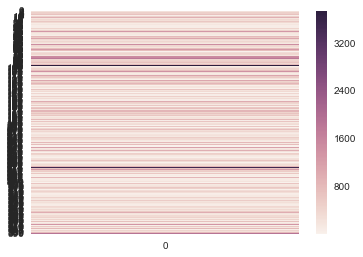

In [28]:
sns.heatmap(testArr)